# Librarires required

In [22]:
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

%matplotlib inline

Loading BokehJS ...

In [3]:
import requests
import pandas as pd
import numpy as np
from newspaper import Article
import nltk
nltk.download('punkt')
import warnings
import base64
import numpy as np
import pandas as pd

# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Other imports
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib import pyplot as plt
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# WEB SCRAPPING THE ARTICLES

In [4]:
! pip install beautifulsoup4
import requests
from bs4 import BeautifulSoup
site = requests.get('https://timesofindia.indiatimes.com/home/headlines')
coverpage = site.content

In [5]:
soup1 = BeautifulSoup(coverpage, 'html5lib')

In [6]:
coverpage_news = soup1.find_all('span', {'class':'w_tle'},'href')

In [7]:
coverpage_news

[<span class="w_tle"><a href="/city/lucknow/crime-against-women-up-plans-to-name-shame-habitual-offenders/articleshow/78306788.cms" pg="-city#Story_View-1-geturl" title="‘Operation Durachari’: UP to name and shame sex offenders">‘Operation Durachari’: UP to name and shame sex offenders</a></span>,
 <span class="w_tle"><a href="/india/bihar-assembly-elections-nitish-kumar-tejashwi-yadav-live-updates/liveblog/78288550.cms" pg="-india#Story_View-2-geturl" title="Live: EC to announce Bihar poll dates at 12.30pm">Live: EC to announce Bihar poll dates at 12.30pm</a></span>,
 <span class="w_tle"><a href="/city/chandigarh/bharat-bandh-live-updates-farmers-nationwide-protest-against-farm-bills-2020/liveblog/78307425.cms" pg="-city#Story_View-3-geturl" title="Live: Reforms for welfare of farmers, says PM">Live: Reforms for welfare of farmers, says PM</a></span>,
 <span class="w_tle"><a href="/india/coronavirus-live-updates-24-september-2020/liveblog/78286283.cms" pg="-india#Story_View-4-geturl" 

In [8]:
coverpage_news[0].get_text() #<h3 class="post-title"> <a href="https://globalvoices.org/2020/09/14/african-union-turns-to-biosurveillance-tech-to-curb-covid-19/" title="African Union turns to biosurveillance tech to curb COVID-19" rel="bookmark">African Union turns to biosurveillance tech to curb COVID-19</a></h3>

'‘Operation Durachari’: UP to name and shame sex offenders'

In [9]:
coverpage_news[200].find('a')['href']

'/life-style/fashion/buzz/this-pakistani-bride-wore-a-beautiful-dark-red-sari-for-her-nikah-and-we-are-speechless/articleshow/78298683.cms'

In [10]:
coverpage_news = soup1.find_all('span', {'class':'w_tle'},'href')

In [11]:
#coverpage_news[0].find('a')['pg href']

In [12]:
coverpage_news[0].find('a')

<a href="/city/lucknow/crime-against-women-up-plans-to-name-shame-habitual-offenders/articleshow/78306788.cms" pg="-city#Story_View-1-geturl" title="‘Operation Durachari’: UP to name and shame sex offenders">‘Operation Durachari’: UP to name and shame sex offenders</a>

In [13]:
# Scraping the first 5 articles
number_of_articles =200

# Empty lists for content, links and titles
news_contents = []
list_links = []
list_titles = []


for n in np.arange(0, number_of_articles):
    link = coverpage_news[n].find('a')['href']
    list_links.append(link)
    
    # Getting the title
    title = coverpage_news[n].get_text()
    list_titles.append(title)
    
    
    

In [14]:
list_titles

['‘Operation Durachari’: UP to name and shame sex offenders',
 'Live: EC to announce Bihar poll dates at 12.30pm',
 'Live: Reforms for welfare of farmers, says PM',
 'Covid live: India reports spike of 86k new cases',
 'How Covid hit Indian students studying abroad',
 'Live: Rakul at NCB office to record statement',
 'Why Covid may be life-threatening for some',
 'Dean Jones was ahead of his time in ODIs: Shastri',
 'Can one be disqualified from a vaccine trial?',
 'Amazon’s hardware event: Biggest announcements',
 'Harley shuts India factory, may tie up with Hero',
 '3 lakh and on, WagonR becomes top-selling CNG car',
 'Why NCB has summoned Deepika, Sara, Rakul',
 'Pakistani YouTube keeps talks on India alive',
 "Google's new 'plan' to get employees back to work",
 'Brett Lee tried desperately to revive Dean Jones',
 'The right project, location & price in Pune east',
 'Commissioner arrested for raping model',
 '2020 monsoon is Mumbai’s 2nd wettest till now',
 'In a first, Mumbai circ

In [15]:
aff=[]
adt=[]
for i in list_links:
    x = i.startswith("https")
    if x == True :
        aff.append(i) 
    else :
        aff.append('https://timesofindia.indiatimes.com/'+i)

In [16]:
aff

['https://timesofindia.indiatimes.com//city/lucknow/crime-against-women-up-plans-to-name-shame-habitual-offenders/articleshow/78306788.cms',
 'https://timesofindia.indiatimes.com//india/bihar-assembly-elections-nitish-kumar-tejashwi-yadav-live-updates/liveblog/78288550.cms',
 'https://timesofindia.indiatimes.com//city/chandigarh/bharat-bandh-live-updates-farmers-nationwide-protest-against-farm-bills-2020/liveblog/78307425.cms',
 'https://timesofindia.indiatimes.com//india/coronavirus-live-updates-24-september-2020/liveblog/78286283.cms',
 'https://timesofindia.indiatimes.com//india/alienation-no-access-to-labs-classes-at-3am-how-pandemic-disrupted-lives-of-indian-students-studying-abroad/articleshow/78296079.cms',
 'https://timesofindia.indiatimes.com//entertainment/hindi/bollywood/news/sushant-singh-rajput-case-live-updates-deepika-padukone-rakul-preet-singh-sara-ali-khan-shraddha-kapoor-bollywood-drug-probe/liveblog/78308524.cms',
 'https://timesofindia.indiatimes.com//home/science/t

In [17]:
ARRT=[]
for i in aff:
    if i !='null':
        article = Article(i , language = "en")
        article.download() 
        article.parse() 
        article.nlp()
        y=article.text
        ARRT.append(y)
    else:
        k='null'
        ARRT.append(k)

In [18]:
ARRT

['LUCKNOW: The UP government is planning ‘ Operation Durachari ’, to be launched soon for naming and shaming habitual offenders in the cases of crime against women. Chief minister Yogi Adityanath has also instructed the police to strengthen ‘ anti-Romeo squads’ across the state.\n\nAlthough the modalities and other details of ‘Operation Durachari’ are yet to be finalised, sources in the state home department said that photographs of those found to be habitual offenders in cases of sexual harassment and other crime against women would be put on display at prominent crossings.\n\nIt has also been decided that all those involved in crime against women should be handled by women officers only. If there is any criminal incident with a woman, then the respective beat in-charge, outpost incharge, police station in-charge and circle officer would be held responsible.\n\nDGP HC Awasthy also instructed district police chiefs to take strict action in cases of crime against women and strengthen th

In [19]:
s=pd.DataFrame(list(zip(ARRT, list_titles)), columns=['article','title'])
s.to_csv(r'dataframe.csv', index = False, header=True)

In [21]:
s

,article,title
0,LUCKNOW: The UP government is planning ‘ Opera...,‘Operation Durachari’: UP to name and shame se...
1,"Tejashwi Yadav not acceptable as leader, 'Maha...",Live: EC to announce Bihar poll dates at 12.30pm
2,All BJP Karyakartas should reach out to farmer...,"Live: Reforms for welfare of farmers, says PM"
3,This is why Covid may be life-threatening for ...,Covid live: India reports spike of 86k new cases
4,Read the full article\n\nJoin us and get acces...,How Covid hit Indian students studying abroad
5,Exclusive! Will Deepika Padukone be arrested o...,Live: Rakul at NCB office to record statement
6,When two brothers fell critically ill with\n\n...,Why Covid may be life-threatening for some
7,ONE-DAY WONDER: Dean Jones blazes away in coun...,Dean Jones was ahead of his time in ODIs: Shastri
8,"However, even though some groups are running '...",Can one be disqualified from a vaccine trial?
9,Amazon announced the launch of its fourth-gene...,Amazon’s hardware event: Biggest announcements


# DATA PREPROCESSING FOR LSA

In [23]:
reindexed_data=s['article']

In [24]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

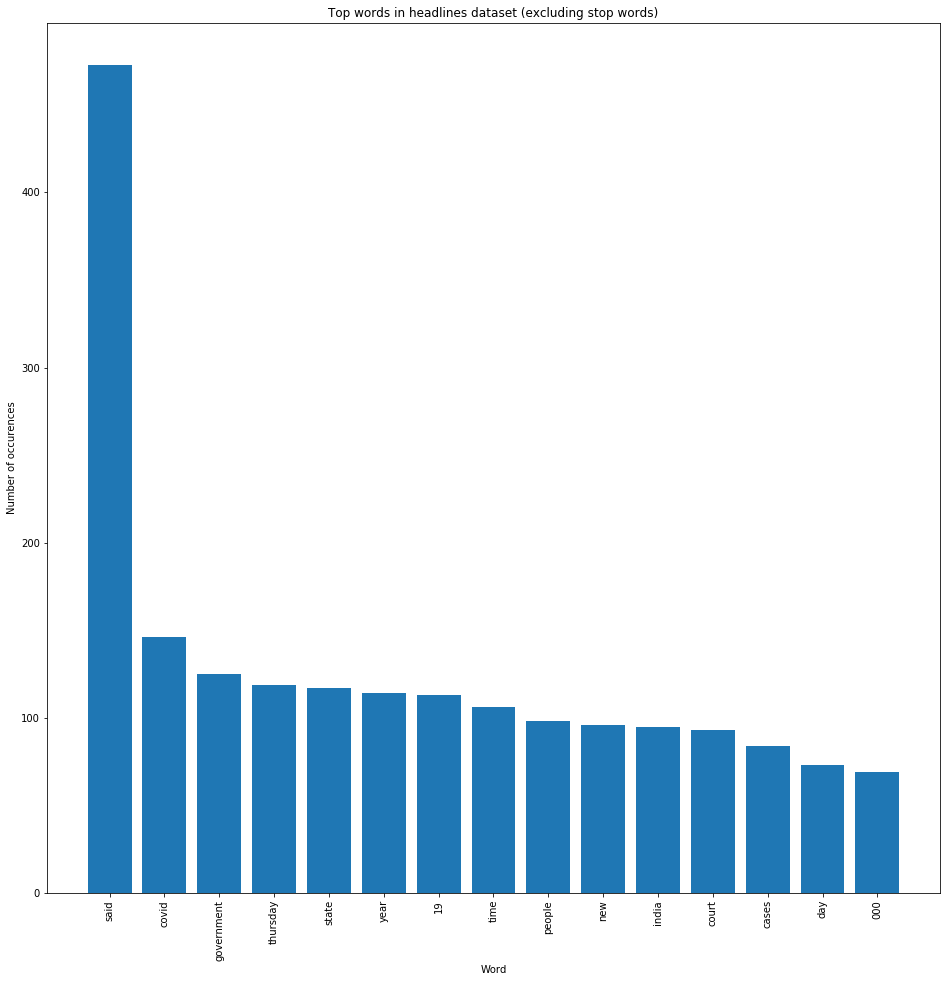

In [25]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=reindexed_data)

fig, ax = plt.subplots(figsize=(16,16))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()


In [26]:
reindexed_data.shape[0]

200

In [27]:
tagged_headlines = [TextBlob(reindexed_data[i]).pos_tags for i in range(reindexed_data.shape[0])]

In [28]:
tagged_headlines_df = pd.DataFrame({'tags':tagged_headlines})

word_counts = [] 
pos_counts = {}

for headline in tagged_headlines_df[u'tags']:
    word_counts.append(len(headline))
    for tag in headline:
        if tag[1] in pos_counts:
            pos_counts[tag[1]] += 1
        else:
            pos_counts[tag[1]] = 1
            
print('Total number of words: ', np.sum(word_counts))
print('Mean number of words per headline: ', np.mean(word_counts))

Total number of words:  63020
Mean number of words per headline:  315.1


C:\Users\GT\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning:

invalid value encountered in true_divide



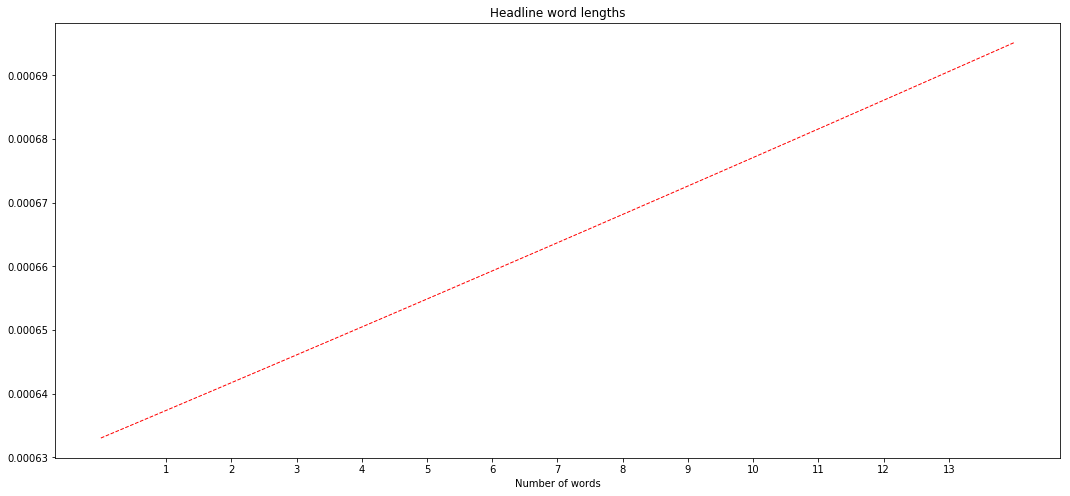

In [29]:
y = stats.norm.pdf(np.linspace(0,14,50), np.mean(word_counts), np.std(word_counts))
fig, ax = plt.subplots(figsize=(18,8))
ax.hist(word_counts, bins=range(1,14), density=True);
ax.plot(np.linspace(0,14,50), y, 'r--', linewidth=1);
ax.set_title('Headline word lengths');
ax.set_xticks(range(1,14));
ax.set_xlabel('Number of words');
plt.show()

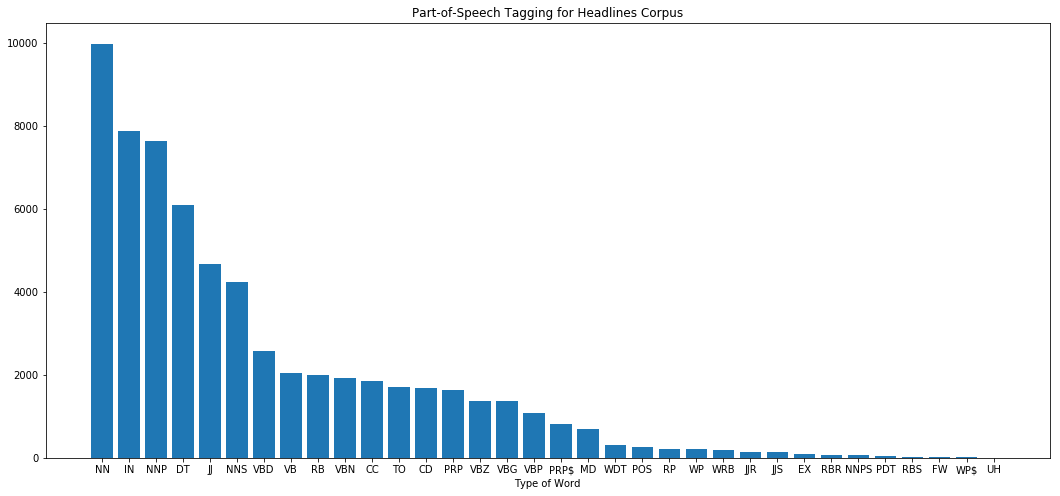

In [30]:
pos_sorted_types = sorted(pos_counts, key=pos_counts.__getitem__, reverse=True)
pos_sorted_counts = sorted(pos_counts.values(), reverse=True)

fig, ax = plt.subplots(figsize=(18,8))
ax.bar(range(len(pos_counts)), pos_sorted_counts);
ax.set_xticks(range(len(pos_counts)));
ax.set_xticklabels(pos_sorted_types);
ax.set_title('Part-of-Speech Tagging for Headlines Corpus');
ax.set_xlabel('Type of Word');

In [31]:
all_words = s['article'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 (Uncleaned) Word frequencies in the training dataset'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

In [32]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = reindexed_data.sample(n=200, random_state=0).values

print('Headline before vectorization: {}'.format(small_text_sample[0]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Headline after vectorization: \n{}'.format(small_document_term_matrix[0]))

Headline before vectorization: MUMBAI: The city has witnessed its second wettest monsoon in recorded history. With the India Meteorological Department’s Santacruz observatory, representative of Mumbai, recording 395.1mm rainfall in the 48 hours ending Thursday morning, this year’s total seasonal rain of 3,679.8mm beat 2019’s tally of 3,670.4mm.The highest seasonal (June 1 to September 30) rainfall for the city is 3,759.7mm, recorded in 1958. This year, with a week to go for monsoon to be officially over, the total is nearly 80mm short of the record.This monsoon, the Colaba observatory received total rain of 3,198.7mm until 8.30 pm on Thursday, the highest seasonal rain since 1983, when it had recorded 3,329.8mm.As the showers continued well into the night, Santacruz recorded 108.7mm rainfall in the 24 hours ending 8.30am on Thursday. Colaba recorded 50.4mm rain in the same period. But as Mumbaikars woke up to clear skies and sunshine on Thursday, the IMD Santacruz station recorded just

# LSA TOPIC MODELLING

In [33]:
n_topics = 25

In [34]:
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [35]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [36]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [37]:
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [38]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  said covid government thursday 19 state year time people india
Topic 2:  cases number zones containment reported said district covid deaths 19
Topic 3:  patients interferon covid 19 said immune threatening response virus disease
Topic 4:  oil palm said labour ap workers plantations including abuses like
Topic 5:  court trump election ginsburg president justice supreme said death high
Topic 6:  periyar murugan said bjp party social state accept leaders principles
Topic 7:  foreign said dhs admissions immigration students admission period country status
Topic 8:  rio carnival said samba schools city parties million street school
Topic 9:  harley india company mahindra hero plans partnership duty continue structure
Topic 10:  swimming swimmers says pools water competitive open coaches pool shreesh
Topic 11:  deaths day 000 week average recorded number china total cases
Topic 12:  kashmir minister abdullah farooq anti national statement jitendra advice india
Topic 13:  students e

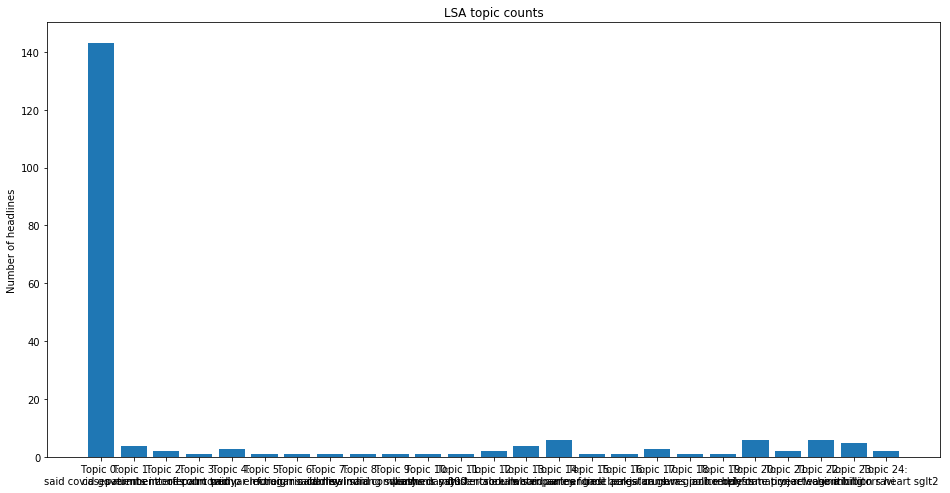

In [39]:
top_3_words = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of headlines');
ax.set_title('LSA topic counts');
plt.show()

In [40]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.318s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 2.295963
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.571304
[t-SNE] KL divergence after 1200 iterations: 0.344194


In [41]:
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [44]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ,
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",])
colormap = colormap[:n_topics]

In [46]:
top_3_words_lsa = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

# LDA Data Preprocessing

In [56]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()


In [57]:
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [58]:
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))


In [59]:
# Storing the entire training text in a list
text = list(s.article.values)
# Calling our overwritten Count vectorizer
tf_vectorizer = LemmaCountVectorizer(max_df=0.95, 
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
tf = tf_vectorizer.fit_transform(text)

In [60]:
feature_names = tf_vectorizer.get_feature_names()
count_vec = np.asarray(tf.sum(axis=0)).ravel()
zipped = list(zip(feature_names, count_vec))
x, y = (list(x) for x in zip(*sorted(zipped, key=lambda x: x[1], reverse=True)))
# Now I want to extract out on the top 15 and bottom 15 words
Y = np.concatenate([y[0:15], y[-16:-1]])
X = np.concatenate([x[0:15], x[-16:-1]])

# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
            x = x[0:50],
            y = y[0:50],
            marker= dict(colorscale='Jet',
                         color = y[0:50]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 Word frequencies after Preprocessing'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
            x = x[-100:],
            y = y[-100:],
            marker= dict(colorscale='Portland',
                         color = y[-100:]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Bottom 100 Word frequencies after Preprocessing'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

# LDA MODELLING

In [61]:
lda = LatentDirichletAllocation(n_components=11, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)

In [62]:
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=11, random_state=0)

In [64]:
n_top_words = 20
print("\nTopics in LDA model: ")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic #0:music video student singer exam imran lockdown song accused pray said director spb gaaru prayer thaman segment conductor asked khan

Topic #1:get new currency note speaker bus device design priced nov smart police home r bed best company routine rajkot 14pm

Topic #2:crore r company actress ed neha indian hyderabad said account chinese seen sharma style bogey notice revealed transaction case merchant

Topic #3:said year covid time state day thursday government case 19 people new country death india official world month pandemic week

Topic #4:information rti release sasikala jail prison central applicant official date detail billion court letter said commission tihar application prisoner activist

Topic #5:race champion grand van time prix driver upgrade said racing record point team road ferrari ll stroll russian weekend world

Topic #6:mobile phone usage said child accident used hyderabad bus acre technique help company deep artificial loss india lear

# WORDCLOUD

In [69]:
from wordcloud import WordCloud

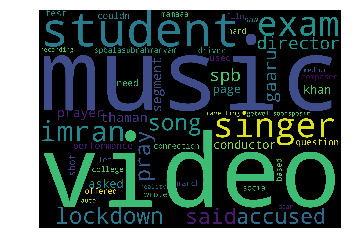

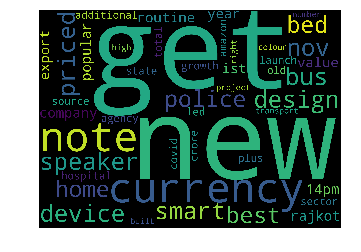

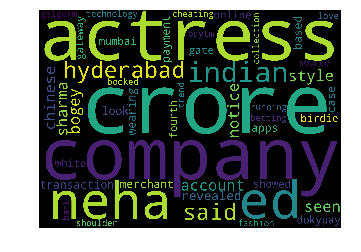

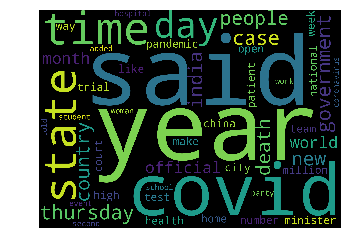

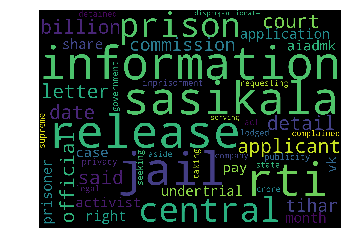

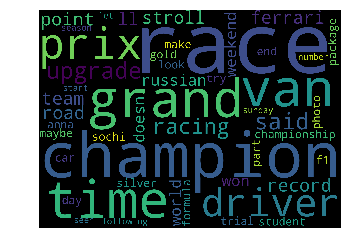

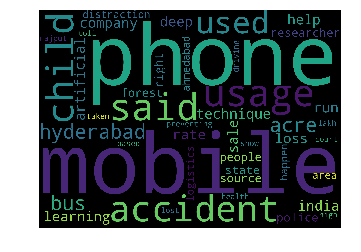

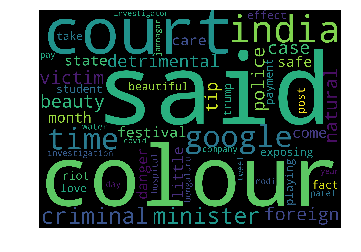

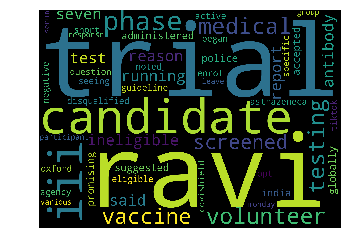

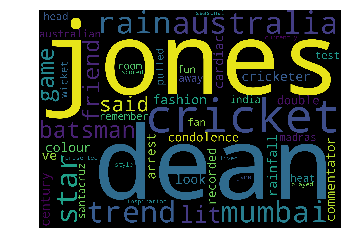

In [79]:
for i in range(0,10):
    first_topic = lda.components_[i]
    first_topic_words = [tf_feature_names[k] for k in first_topic.argsort()[:-50 - 1 :-1]]
    firstcloud = WordCloud(
                          stopwords='english',
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(first_topic_words))
    plt.imshow(firstcloud)
    plt.axis('off')
    plt.show()